# Анализ базы данных сервиса для чтения книг по подписке

# Описание проекта

Компания купила крупный сервис для чтения книг по подписке. Первая задача аналитика — проанализировать базу данных.
В ней — информация о книгах, издательствах, авторах, а также пользовательские обзоры книг. Эти данные помогут сформулировать ценностное предложение для нового продукта.

# Описание данных

Таблица **books**

Содержит данные о книгах:

book_id — идентификатор книги;

author_id — идентификатор автора;

title — название книги;

num_pages — количество страниц;

publication_date — дата публикации книги;

publisher_id — идентификатор издателя.

Таблица **authors**

Содержит данные об авторах:

author_id — идентификатор автора;

author — имя автора.

Таблица **publishers**

Содержит данные об издательствах:

publisher_id — идентификатор издательства;

publisher — название издательства;

Таблица **ratings**

Содержит данные о пользовательских оценках книг:

rating_id — идентификатор оценки;

book_id — идентификатор книги;

username — имя пользователя, оставившего оценку;

rating — оценка книги.

Таблица **reviews**

Содержит данные о пользовательских обзорах:

review_id — идентификатор обзора;

book_id — идентификатор книги;

username — имя автора обзора;

text — текст обзора.

**Схема данных:**
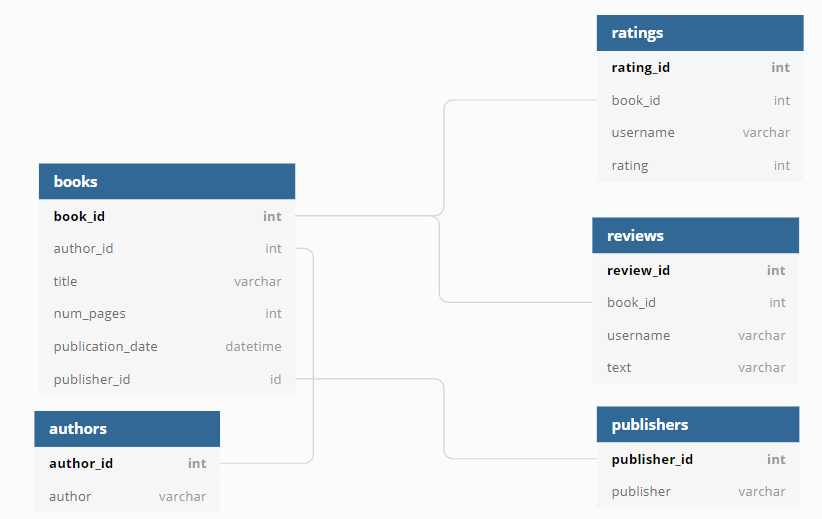

# Задачи

1) Опишите цели исследования;

2) Исследуйте таблицы — выведите первые строки;

3) Сделайте по одному SQL-запросу для решения каждого задания;

4) Выведите результаты каждого запроса в тетрадке;

5) Опишите выводы по каждой из решённых задач.

# Цели исследования

1) Посчитайте, сколько книг вышло после 1 января 2000 года;

2) Для каждой книги посчитайте количество обзоров и среднюю оценку;

3) Определите издательство, которое выпустило наибольшее число книг толще 50 страниц — так вы исключите из анализа брошюры;

4) Определите автора с самой высокой средней оценкой книг — учитывайте только книги с 50 и более оценками;

5) Посчитайте среднее количество обзоров от пользователей, которые поставили больше 48 оценок.

## Загрузка библиотек

In [1]:
import pandas as pd
from sqlalchemy import text, create_engine

## Подключение к бд и проверка корректности работы

In [3]:
connection_string = 'postgresql://{user}:{pwd}@{host}:{port}/{db}'.format(
            **db_config)

In [4]:
engine = create_engine(connection_string, connect_args={'sslmode': 'require'})

In [5]:
query = '''SELECT * FROM books LIMIT 10'''

In [6]:
con=engine.connect()
pd.io.sql.read_sql(sql=text(query), con = con)

,book_id,author_id,title,num_pages,publication_date,publisher_id
0,1,546,'Salem's Lot,594,2005-11-01,93
1,2,465,1 000 Places to See Before You Die,992,2003-05-22,336
2,3,407,13 Little Blue Envelopes (Little Blue Envelope...,322,2010-12-21,135
3,4,82,1491: New Revelations of the Americas Before C...,541,2006-10-10,309
4,5,125,1776,386,2006-07-04,268
5,6,257,1st to Die (Women's Murder Club #1),424,2005-05-20,116
6,7,258,2nd Chance (Women's Murder Club #2),400,2005-05-20,116
7,8,260,4th of July (Women's Murder Club #4),448,2006-06-01,318
8,9,563,A Beautiful Mind,461,2002-02-04,104
9,10,445,A Bend in the Road,341,2005-04-01,116


## Ознакомление с данными

In [7]:
def _sql_query(table_name, limit=10):
    query = f'SELECT * FROM {table_name} LIMIT {limit}'
    sql_result = pd.io.sql.read_sql(sql=text(query), con=con)
    return sql_result

In [8]:
_sql_query('authors')

,author_id,author
0,1,A.S. Byatt
1,2,Aesop/Laura Harris/Laura Gibbs
2,3,Agatha Christie
3,4,Alan Brennert
4,5,Alan Moore/David Lloyd
5,6,Alan Paton
6,7,Albert Camus/Justin O'Brien
7,8,Aldous Huxley
8,9,Aldous Huxley/Christopher Hitchens
9,10,Aleksandr Solzhenitsyn/H.T. Willetts


In [9]:
_sql_query('books')

,book_id,author_id,title,num_pages,publication_date,publisher_id
0,1,546,'Salem's Lot,594,2005-11-01,93
1,2,465,1 000 Places to See Before You Die,992,2003-05-22,336
2,3,407,13 Little Blue Envelopes (Little Blue Envelope...,322,2010-12-21,135
3,4,82,1491: New Revelations of the Americas Before C...,541,2006-10-10,309
4,5,125,1776,386,2006-07-04,268
5,6,257,1st to Die (Women's Murder Club #1),424,2005-05-20,116
6,7,258,2nd Chance (Women's Murder Club #2),400,2005-05-20,116
7,8,260,4th of July (Women's Murder Club #4),448,2006-06-01,318
8,9,563,A Beautiful Mind,461,2002-02-04,104
9,10,445,A Bend in the Road,341,2005-04-01,116


In [10]:
_sql_query('ratings')

,rating_id,book_id,username,rating
0,1,1,ryanfranco,4
1,2,1,grantpatricia,2
2,3,1,brandtandrea,5
3,4,2,lorichen,3
4,5,2,mariokeller,2
5,6,3,johnsonamanda,4
6,7,3,scotttamara,5
7,8,3,lesliegibbs,5
8,9,4,abbottjames,5
9,10,4,valenciaanne,4


In [11]:
_sql_query('reviews')

,review_id,book_id,username,text
0,1,1,brandtandrea,Mention society tell send professor analysis. ...
1,2,1,ryanfranco,Foot glass pretty audience hit themselves. Amo...
2,3,2,lorichen,Listen treat keep worry. Miss husband tax but ...
3,4,3,johnsonamanda,Finally month interesting blue could nature cu...
4,5,3,scotttamara,Nation purpose heavy give wait song will. List...
5,6,3,lesliegibbs,Analysis no several cause international.
6,7,4,valenciaanne,One there cost another. Say type save. With pe...
7,8,4,abbottjames,Within enough mother. There at system full rec...
8,9,5,npowers,Thank now focus realize economy focus fly. Ite...
9,10,5,staylor,Game push lot reduce where remember. Including...


In [12]:
_sql_query('publishers')

,publisher_id,publisher
0,1,Ace
1,2,Ace Book
2,3,Ace Books
3,4,Ace Hardcover
4,5,Addison Wesley Publishing Company
5,6,Aladdin
6,7,Aladdin Paperbacks
7,8,Albin Michel
8,9,Alfred A. Knopf
9,10,Alfred A. Knopf Books for Young Readers


**Промежуточный вывод**: Таблицы отображаются корректно. Можно приступать к исследовательскому анализу.

## Исследовательский анализ

### Количество книг, которые  вышли после 1 января 2000 года;

In [13]:
query = '''SELECT COUNT(DISTINCT b.book_id)
           FROM books AS b
           WHERE b.publication_date >= '2000-01-01'
           '''

In [14]:
pd.io.sql.read_sql(sql=text(query), con = con)

,count
0,821


**Промежуточный вывод**: Всего вышло 821 книг после 1 января 2000 года.

### Для каждой книги посчитайте количество обзоров и среднюю оценку

In [15]:
query = '''SELECT b.title,
                  COUNT(DISTINCT rv.review_id) AS cnt,
                  AVG(rt.rating) AS avg 
           FROM books AS b
           LEFT JOIN ratings AS rt ON rt.book_id = b.book_id
           LEFT JOIN reviews AS rv ON rv.book_id = b.book_id
           GROUP BY b.title, b.book_id
           ORDER BY avg DESC
'''

In [16]:
pd.io.sql.read_sql(sql=text(query), con = con)

,title,cnt,avg
0,Arrows of the Queen (Heralds of Valdemar #1),2,5.00
1,The Walking Dead Book One (The Walking Dead #...,2,5.00
2,Light in August,2,5.00
3,Wherever You Go There You Are: Mindfulness Me...,2,5.00
4,Captivating: Unveiling the Mystery of a Woman'...,2,5.00
...,...,...,...
995,The World Is Flat: A Brief History of the Twen...,3,2.25
996,His Excellency: George Washington,2,2.00
997,Drowning Ruth,3,2.00
998,Junky,2,2.00


In [17]:
query = '''SELECT SUM(cnt)
           FROM (SELECT b.title,
                  COUNT(DISTINCT rv.review_id) AS cnt,
                  AVG(rt.rating) AS avg 
           FROM books AS b
           LEFT JOIN ratings AS rt ON rt.book_id = b.book_id
           LEFT JOIN reviews AS rv ON rv.book_id = b.book_id
           GROUP BY b.title, b.book_id
           ORDER BY avg DESC) AS sum_cnt
'''

In [18]:
pd.io.sql.read_sql(sql=text(query), con = con)

,sum
0,2793.0


In [19]:
query = '''SELECT SUM(c_nt)
           FROM (SELECT COUNT(review_id) AS c_nt
                 FROM reviews) AS rv_cnt'''

In [20]:
pd.io.sql.read_sql(sql=text(query), con = con)

,sum
0,2793.0


**Промежуточный вывод**: Итоговая таблица отсортированная по среднему значению оценки по убыванию. Посмотрим на топ 10 книгю

In [21]:
query = '''SELECT b.title,
                  COUNT(DISTINCT rv.review_id) AS cnt,
                  AVG(rt.rating) AS avg 
           FROM books AS b
           LEFT JOIN ratings AS rt ON rt.book_id = b.book_id
           LEFT JOIN reviews AS rv ON rv.book_id = b.book_id
           GROUP BY b.title, b.book_id
           ORDER BY avg DESC
           LIMIT 10
'''

In [22]:
pd.io.sql.read_sql(sql=text(query), con = con)

,title,cnt,avg
0,Arrows of the Queen (Heralds of Valdemar #1),2,5.0
1,Crucial Conversations: Tools for Talking When ...,2,5.0
2,Alas Babylon,2,5.0
3,Act of Treason (Mitch Rapp #9),2,5.0
4,Angels Fall,2,5.0
5,Captivating: Unveiling the Mystery of a Woman'...,2,5.0
6,A Woman of Substance (Emma Harte Saga #1),2,5.0
7,A Fistful of Charms (The Hollows #4),2,5.0
8,A Dirty Job (Grim Reaper #1),4,5.0
9,Dead Souls,2,5.0


**Промежуточный вывод**: Из топ 10 книг по среднему рейтингу Arrows of the Queen (Heralds of Valdemar #1) имеет самый большой показатель количества просмотров.

In [23]:
query = '''SELECT b.title,
                  COUNT(DISTINCT rv.review_id) AS cnt,
                  AVG(rt.rating) AS avg 
           FROM books AS b
           LEFT JOIN ratings AS rt ON rt.book_id = b.book_id
           LEFT JOIN reviews AS rv ON rv.book_id = b.book_id
           GROUP BY b.title, b.book_id
           ORDER BY cnt DESC
           LIMIT 10
'''

In [24]:
pd.io.sql.read_sql(sql=text(query), con = con)

,title,cnt,avg
0,Twilight (Twilight #1),7,3.662500
1,The Da Vinci Code (Robert Langdon #2),6,3.830508
2,Eat Pray Love,6,3.395833
3,The Alchemist,6,3.789474
4,The Catcher in the Rye,6,3.825581
5,The Curious Incident of the Dog in the Night-Time,6,4.081081
6,Harry Potter and the Prisoner of Azkaban (Harr...,6,4.414634
7,Harry Potter and the Chamber of Secrets (Harry...,6,4.287500
8,Outlander (Outlander #1),6,4.125000
9,The Book Thief,6,4.264151


**Промежуточный вывод**: Книга Twilight (Twilight #1) имеет самый большой показатель просмотров вне зависимости от среднего рейтинга.

###  Определите издательство, которое выпустило наибольшее число книг толще 50 страниц — так вы исключите из анализа брошюры

In [25]:
query = '''SELECT p.publisher,
                  COUNT(b.book_id) AS cnt
           FROM publishers AS p
           INNER JOIN books AS b ON b.publisher_id=p.publisher_id
           WHERE b.num_pages >= 50
           GROUP BY p.publisher
           ORDER BY cnt DESC
           LIMIT 1
'''

In [26]:
pd.io.sql.read_sql(sql=text(query), con = con)

,publisher,cnt
0,Penguin Books,42


**Промежуточный вывод**: Издательсвто Penguin Books имеет самый высокий показатель.

###  Определите автора с самой высокой средней оценкой книг — учитывайте только книги с 50 и более оценками

In [27]:
query = '''with bk_rt AS (SELECT bk.book_id,
                                 COUNT(rt.rating) AS cnt
                          FROM books AS bk
                          INNER JOIN ratings AS rt ON rt.book_id=bk.book_id
                          GROUP BY bk.book_id
                          HAVING COUNT(rt.rating) >= 50 
                          ORDER BY COUNT(rt.rating) DESC)
          SELECT a.author,
                 AVG(r.rating) AS avg
          FROM authors AS a
          INNER JOIN books AS b ON b.author_id=a.author_id
          INNER JOIN ratings AS r ON b.book_id=r.book_id
          INNER JOIN bk_rt ON bk_rt.book_id=b.book_id
          GROUP BY a.author
          ORDER BY avg DESC
          LIMIT 1
          
'''

In [28]:
pd.io.sql.read_sql(sql=text(query), con = con)

,author,avg
0,J.K. Rowling/Mary GrandPré,4.287097


**Промежуточный вывод:** J.K. Rowling/Mary GrandPré имеет самую высокую среднюю оценку книг.

### Посчитайте среднее количество обзоров от пользователей, которые поставили больше 48 оценок

In [31]:
query = '''SELECT AVG(review_cnt)
           FROM (SELECT r.username,
                        COUNT(*) AS review_cnt
                 FROM reviews AS r
                 WHERE username IN ( SELECT rt.username
                                     FROM ratings AS rt
                                     GROUP BY rt.username
                                     HAVING COUNT(*) > 48
                                     
                 )
                 GROUP BY r.username
           ) AS ccnt
'''

In [32]:
pd.io.sql.read_sql(sql=text(query), con = con)

,avg
0,24.0


**Промежуточный вывод**: 24 средний показатель количества обзоров от пользователей, которые поставили больше 48 оценок.

## Итог

**Вывод**: В результате операций был произведен анализ базы данных сервиса для чтения книг по подписке. 

Было установлено:
1) Всего вышло 821 книг после 1 января 2000 года.

2) 
- Из топ 10 книг по среднему рейтингу Arrows of the Queen (Heralds of Valdemar #1) имеет самый большой показатель количества просмотров.

- Книга Twilight (Twilight #1) имеет самый большой показатель просмотров вне зависимости от среднего рейтинга.

3) Издательсвто Penguin Books имеет самый высокий показатель.

4) J.K. Rowling/Mary GrandPré имеет самую высокую среднюю оценку книг.

5) 24 средний показатель количества обзоров от пользователей, которые поставили больше 48 оценок.